In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Veri Setinin satır sütun kontrolü
df = pd.read_excel("Data.xlsx")
df.shape

c:\Users\zeyne\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\zeyne\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


(522064, 7)

In [3]:
#ilk 5 satıra göz atma
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Fatura numarası olmayan verileri çıkartma
df['Itemname'] = df['Itemname'].str.strip()
df.dropna(axis=0, subset=['BillNo'],inplace=True)
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
#Fransadaki marketleri seçip fatura numarasında bulunana ürünleri ve miktarları gruplandırma
basket = (df[df['Country']=="France"]
          .groupby(['BillNo','Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo')         
          )

basket

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Miktar değişkeni 0 olduğunda 0 , 0 dan büyük olduğunda 1 e eşitleme (Beraber alındığı sürece kaçar tane alındığı bizi ilgilendirmiyor)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets

C:\Users\zeyne\AppData\Local\Temp\ipykernel_4480\3837980889.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# minimum desteği (min_support) %9 olan verileri apriori ile hesaplayıp 
# sıklıkla birlikte bulunan (frequent_itemsets) değişkenine atama
frequent_itemsets = apriori(basket_sets, min_support=0.09, use_colnames=True)

#elimizdeki verilerden güven parametresi %80'den büyük olanları listeleme
rules = association_rules(
    frequent_itemsets, metric='confidence', min_threshold=0.8)
rules

c:\Users\zeyne\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(LUNCH BAG APPLE DESIGN),(POSTAGE),0.125000,0.765306,0.104592,0.836735,1.093333,0.008929,1.437500,0.097561
1,(LUNCH BAG WOODLAND),(POSTAGE),0.117347,0.765306,0.102041,0.869565,1.136232,0.012234,1.799320,0.135838
2,(LUNCH BOX WITH CUTLERY RETROSPOT),(POSTAGE),0.142857,0.765306,0.114796,0.803571,1.050000,0.005466,1.194805,0.055556
3,(PLASTERS IN TIN CIRCUS PARADE),(POSTAGE),0.168367,0.765306,0.147959,0.878788,1.148283,0.019107,1.936224,0.155278
4,(PLASTERS IN TIN SPACEBOY),(POSTAGE),0.137755,0.765306,0.114796,0.833333,1.088889,0.009371,1.408163,0.094675
5,(PLASTERS IN TIN WOODLAND ANIMALS),(POSTAGE),0.170918,0.765306,0.137755,0.805970,1.053134,0.006950,1.209576,0.060855
6,(RABBIT NIGHT LIGHT),(POSTAGE),0.188776,0.765306,0.165816,0.878378,1.147748,0.021345,1.929705,0.158684
7,(RED RETROSPOT MINI CASES),(POSTAGE),0.137755,0.765306,0.114796,0.833333,1.088889,0.009371,1.408163,0.094675
8,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.181122,0.765306,0.158163,0.873239,1.141033,0.019549,1.851474,0.150940
9,(REGENCY CAKESTAND 3 TIER),(POSTAGE),0.125000,0.765306,0.104592,0.836735,1.093333,0.008929,1.437500,0.097561


In [8]:
# lift değeri 5 ten büyük olanları ayıklama
rules[(rules['lift'] >= 5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,0.956140
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343
19,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES)",(SET/6 RED SPOTTY PAPER CUPS),0.107143,0.137755,0.102041,0.952381,6.913580,0.087281,18.107143,0.958000
20,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.117347,0.127551,0.102041,0.869565,6.817391,0.087073,6.688776,0.966763
22,(SET/6 RED SPOTTY PAPER PLATES),"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",0.127551,0.117347,0.102041,0.800000,6.817391,0.087073,4.413265,0.978070
23,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796,0.956294
24,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959,0.967949
25,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850,0.953488


In [9]:
# örneğin 16 nolu veriyi incelediğimizde
 #(SET/6 RED SPOTTY PAPER PLATES) alan müşterilerin (SET/20 RED RETROSPOT PAPER NAPKINS)alma ihtimallerinin oldukça yüksek olduğunu söyleyebiliriz
# bu örnekte 

# (SET/6 RED SPOTTY PAPER PLATES) alan müşterilerin %96 sının (SET/20 RED RETROSPOT PAPER NAPKINS) aldığını görebiliriz 	(Confidence)

<BarContainer object of 26 artists>

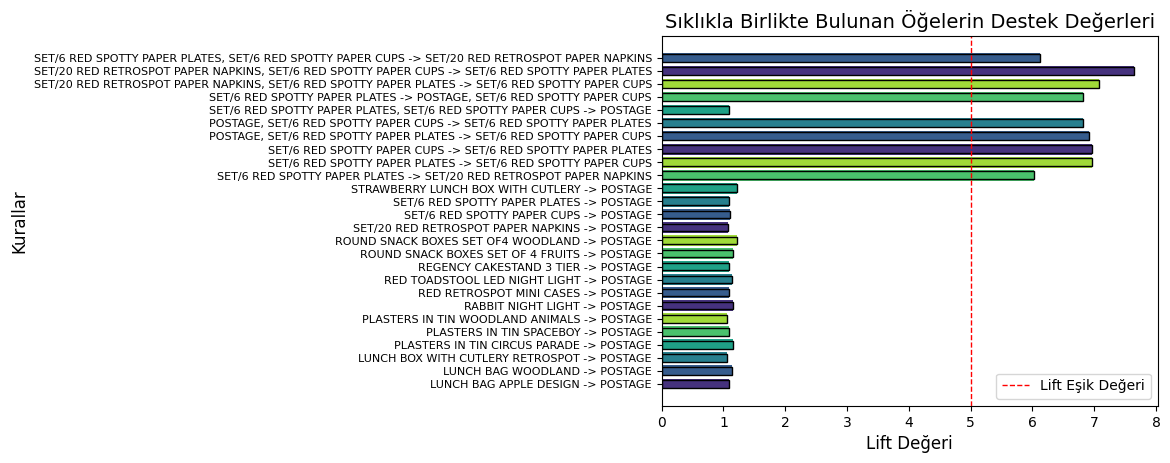

In [10]:
# Örnek: Renk haritası kullanma
plt.barh(range(len(rules)), rules['lift'], color=sns.color_palette('viridis'))

# Örnek: Lift değeri eşik değerinden büyük olan kuralları vurgula
threshold_lift = 5
plt.axvline(x=threshold_lift, color='red', linestyle='--', linewidth=1, label='Lift Eşik Değeri')
plt.legend()

# Örnek: Etiket boyutları ve font stili ayarı
plt.yticks(range(len(rules)), rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(list(x))), fontsize=8)
plt.xlabel('Lift Değeri', fontsize=12)
plt.ylabel('Kurallar', fontsize=12)
plt.title('Sıklıkla Birlikte Bulunan Öğelerin Destek Değerleri', fontsize=14)
# Örnek: Çubuk genişliği ve aralık ayarı
plt.barh(range(len(rules)), rules['lift'], color=sns.color_palette('viridis'), height=0.6, edgecolor='black')